In [1]:
import imageio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)

In [2]:
life = pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col=0)

In [3]:
print(life.shape)

(260, 217)


In [4]:
print(fert.shape)

(260, 216)


In [5]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [6]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [7]:
ncol = [int(x) for x in fert.columns]

In [8]:
fert.set_axis(axis=1, labels=ncol, inplace=True)

In [9]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [10]:
sfert = fert.stack()
slife = life.stack()

In [11]:
sfert

Total fertility rate      
Afghanistan           1800    7.00
                      1801    7.00
                      1802    7.00
                      1803    7.00
                      1804    7.00
                              ... 
Zimbabwe              2011    3.64
                      2012    3.56
                      2013    3.49
                      2014    3.41
                      2015    3.35
Length: 43412, dtype: float64

In [12]:
slife

Life expectancy      
Afghanistan      1800    28.21
                 1801    28.20
                 1802    28.19
                 1803    28.18
                 1804    28.17
                         ...  
South Sudan      2012    56.00
                 2013    56.00
                 2014    56.10
                 2015    56.10
                 2016    56.10
Length: 43857, dtype: float64

In [13]:
d = {'fertility': sfert, 'lifeexp': slife}
df2 = pd.DataFrame(data=d)

In [14]:
df2

fertility  lifeexp
Afghanistan 1800        7.0    28.21
            1801        7.0    28.20
            1802        7.0    28.19
            1803        7.0    28.18
            1804        7.0    28.17
...                     ...      ...
Åland       2002        NaN    81.80
            2003        NaN    80.63
            2004        NaN    79.88
            2005        NaN    80.00
            2006        NaN    80.10

[44007 rows x 2 columns]

In [15]:
pop = pd.read_excel("gapminder_population.xlsx", index_col=0)

In [16]:
print(pop.shape)

(275, 81)


In [17]:
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [18]:
spop = (pop.stack())/1000000

In [19]:
dtest={'population':spop} 

In [20]:
spop

Total population               
Afghanistan                1800    3.280000
                           1810    3.280000
                           1820    3.323519
                           1830    3.448982
                           1840    3.625022
                                     ...   
Sint Maarten (Dutch part)  2011    0.033979
                           2012    0.035134
                           2013    0.036442
                           2014    0.037696
                           2015    0.038745
Length: 20176, dtype: float64

In [21]:
d2 = {'fertility': sfert, 'lifeexp': slife, 'population': spop}
df3 = pd.DataFrame(data=d2)

In [22]:
df3

fertility  lifeexp  population
Afghanistan 1800        7.0    28.21    3.280000
            1801        7.0    28.20         NaN
            1802        7.0    28.19         NaN
            1803        7.0    28.18         NaN
            1804        7.0    28.17         NaN
...                     ...      ...         ...
Åland       2006        NaN    80.10    0.026923
            2007        NaN      NaN    0.026923
            2008        NaN      NaN    0.026923
            2009        NaN      NaN    0.026923
            2010        NaN      NaN    0.026923

[47688 rows x 3 columns]

In [23]:
df4=df3.stack()

In [24]:
df4

Afghanistan  1800  fertility      7.000000
                   lifeexp       28.210000
                   population     3.280000
             1801  fertility      7.000000
                   lifeexp       28.200000
                                   ...    
Åland        2006  population     0.026923
             2007  population     0.026923
             2008  population     0.026923
             2009  population     0.026923
             2010  population     0.026923
Length: 107445, dtype: float64

In [25]:
df5 = df4.unstack((0,2))

In [26]:
df5

Afghanistan                    Akrotiri and Dhekelia   Albania          \
       fertility lifeexp population            population fertility lifeexp   
1800        7.00   28.21   3.280000                   NaN      4.60    35.4   
1801        7.00   28.20        NaN                   NaN      4.60    35.4   
1802        7.00   28.19        NaN                   NaN      4.60    35.4   
1803        7.00   28.18        NaN                   NaN      4.60    35.4   
1804        7.00   28.17        NaN                   NaN      4.60    35.4   
...          ...     ...        ...                   ...       ...     ...   
2012        5.14   54.40  29.726803                   NaN      1.76    77.5   
2013        4.90   54.80  30.682500                   NaN      1.77    77.7   
2014        4.68   54.90  31.627506                   NaN      1.78    77.9   
2015        4.47   53.80  32.526562                   NaN      1.78    78.0   
2016         NaN   52.72        NaN                   NaN       NaN    78.1   

                  Algeria                     ...      Yemen Yugoslavia  \
     population fertility lifeexp population  ... population population   
1800   0.410445      6.99   28.82   2.503218  ...   2.593000        NaN   
1801        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1802        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1803        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1804        NaN      6.99   28.82        NaN  ...        NaN        NaN   
...         ...       ...     ...        ...  ...        ...        ...   
2012   2.880667      2.82   76.20  37.439427  ...  24.882792        NaN   
2013   2.883281      2.80   76.30  38.186135  ...  25.533217        NaN   
2014   2.889676      2.76   76.30  38.934334  ...  26.183676        NaN   
2015   2.896679      2.71   76.40  39.666519  ...  26.832215        NaN   
2016        NaN       NaN   76.50        NaN  ...        NaN        NaN   

        Zambia                     Zimbabwe                         Åland  \
     fertility lifeexp population fertility lifeexp population population   
1800      6.71    32.6   0.747000      6.75   33.70   1.085814        NaN   
1801      6.71    32.6        NaN      6.75   33.70        NaN        NaN   
1802      6.71    32.6        NaN      6.75   33.70        NaN        NaN   
1803      6.71    32.6        NaN      6.75   33.70        NaN        NaN   
1804      6.71    32.6        NaN      6.75   33.70        NaN        NaN   
...        ...     ...        ...       ...     ...        ...        ...   
2012      5.73    54.7  14.786581      3.56   54.20  14.565482        NaN   
2013      5.69    55.6  15.246086      3.49   55.70  14.898092        NaN   
2014      5.64    56.3  15.721343      3.41   57.00  15.245855        NaN   
2015      5.59    56.7  16.211767      3.35   59.30  15.602751        NaN   
2016       NaN    57.1        NaN       NaN   61.69        NaN        NaN   

              
     lifeexp  
1800     NaN  
1801     NaN  
1802     NaN  
1803     NaN  
1804     NaN  
...      ...  
2012     NaN  
2013     NaN  
2014     NaN  
2015     NaN  
2016     NaN  

[217 rows x 667 columns]

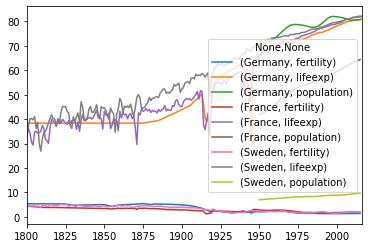

In [27]:
import pylab as pyl
df5[['Germany', 'France', 'Sweden']].plot()

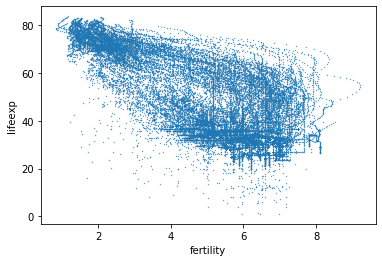

In [28]:
df6 = df4.unstack(2)
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

In [29]:
df7 = df4.unstack(1)
df7

1800   1801   1802   1803   1804  \
Afghanistan           fertility    7.000000   7.00   7.00   7.00   7.00   
                      lifeexp     28.210000  28.20  28.19  28.18  28.17   
                      population   3.280000    NaN    NaN    NaN    NaN   
Akrotiri and Dhekelia population        NaN    NaN    NaN    NaN    NaN   
Albania               fertility    4.600000   4.60   4.60   4.60   4.60   
...                                     ...    ...    ...    ...    ...   
Zimbabwe              fertility    6.750000   6.75   6.75   6.75   6.75   
                      lifeexp     33.700000  33.70  33.70  33.70  33.70   
                      population   1.085814    NaN    NaN    NaN    NaN   
Åland                 lifeexp           NaN    NaN    NaN    NaN    NaN   
                      population        NaN    NaN    NaN    NaN    NaN   

                                   1805   1806   1807   1808   1809  ...  \
Afghanistan           fertility    7.00   7.00   7.00   7.00   7.00  ...   
                      lifeexp     28.16  28.15  28.14  28.13  28.12  ...   
                      population    NaN    NaN    NaN    NaN    NaN  ...   
Akrotiri and Dhekelia population    NaN    NaN    NaN    NaN    NaN  ...   
Albania               fertility    4.60   4.60   4.60   4.60   4.60  ...   
...                                 ...    ...    ...    ...    ...  ...   
Zimbabwe              fertility    6.75   6.75   6.75   6.75   6.75  ...   
                      lifeexp     33.70  33.70  33.70  33.70  33.70  ...   
                      population    NaN    NaN    NaN    NaN    NaN  ...   
Åland                 lifeexp       NaN    NaN    NaN    NaN    NaN  ...   
                      population    NaN    NaN    NaN    NaN    NaN  ...   

                                       2007       2008       2009       2010  \
Afghanistan           fertility    6.460000   6.200000   5.930000   5.660000   
                      lifeexp     52.400000  52.800000  53.300000  53.600000   
                      population  25.877544  26.528741  27.207291  27.962207   
Akrotiri and Dhekelia population   0.015700   0.015700        NaN        NaN   
Albania               fertility    1.800000   1.760000   1.740000   1.740000   
...                                     ...        ...        ...        ...   
Zimbabwe              fertility    3.900000   3.850000   3.790000   3.720000   
                      lifeexp     46.400000  47.300000  48.000000  49.100000   
                      population  13.297798  13.495462  13.720997  13.973897   
Åland                 lifeexp           NaN        NaN        NaN        NaN   
                      population   0.026923   0.026923   0.026923   0.026923   

                                       2011       2012       2013       2014  \
Afghanistan           fertility    5.400000   5.140000   4.900000   4.680000   
                      lifeexp     54.000000  54.400000  54.800000  54.900000   
                      population  28.809167  29.726803  30.682500  31.627506   
Akrotiri and Dhekelia population        NaN        NaN        NaN        NaN   
Albania               fertility    1.750000   1.760000   1.770000   1.780000   
...                                     ...        ...        ...        ...   
Zimbabwe              fertility    3.640000   3.560000   3.490000   3.410000   
                      lifeexp     51.600000  54.200000  55.700000  57.000000   
                      population  14.255592  14.565482  14.898092  15.245855   
Åland                 lifeexp           NaN        NaN        NaN        NaN   
                      population        NaN        NaN        NaN        NaN   

                                       2015   2016  
Afghanistan           fertility    4.470000    NaN  
                      lifeexp     53.800000  52.72  
                      population  32.526562    NaN  
Akrotiri and Dhekelia population        NaN    NaN  
Albania               fertility    1.7

In [30]:
df7 = df7[2000]

In [31]:
df7 = df7.unstack(1)


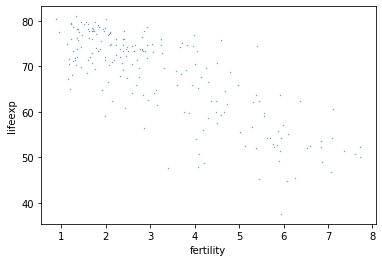

In [32]:
df7.plot.scatter('fertility', 'lifeexp', s=0.1)

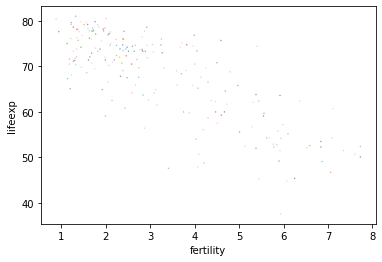

In [33]:
cmap = pyl.get_cmap('tab20', lut = len(df7)).colors
df7.plot.scatter('fertility', 'lifeexp', s=0.1, c=cmap)

<Figure size 1080x1080 with 0 Axes>

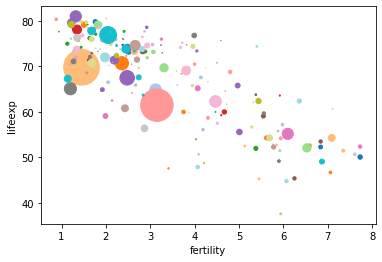

In [34]:
pyl.figure(figsize=(15, 15))
df7.plot.scatter('fertility', 'lifeexp', s=df7['population'], c=cmap)
pyl.savefig(f'plotsFERT/test200.png')

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 1080x1080 with 0 Axes>

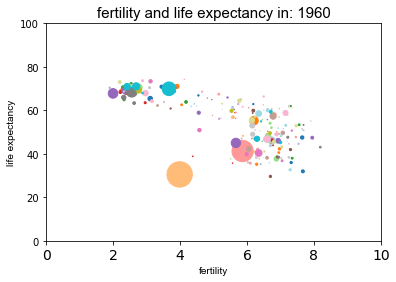

<Figure size 1080x1080 with 0 Axes>

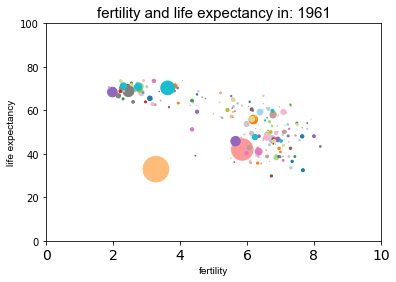

<Figure size 1080x1080 with 0 Axes>

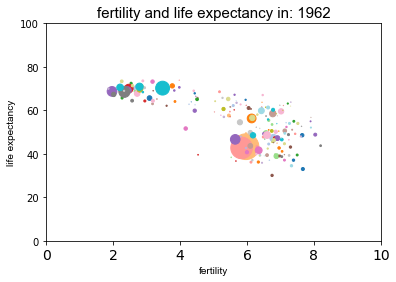

<Figure size 1080x1080 with 0 Axes>

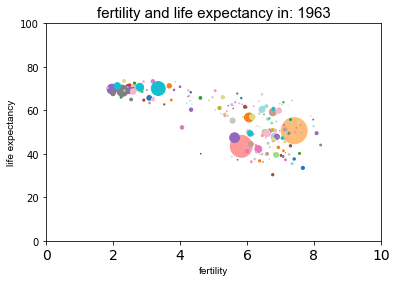

<Figure size 1080x1080 with 0 Axes>

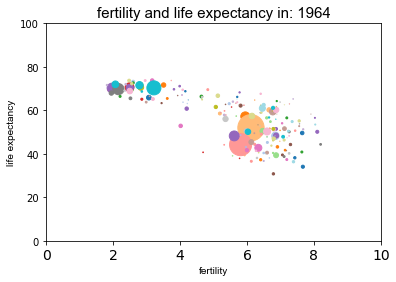

<Figure size 1080x1080 with 0 Axes>

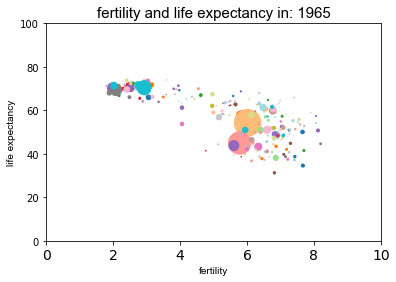

<Figure size 1080x1080 with 0 Axes>

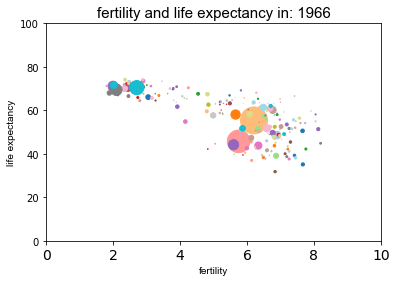

<Figure size 1080x1080 with 0 Axes>

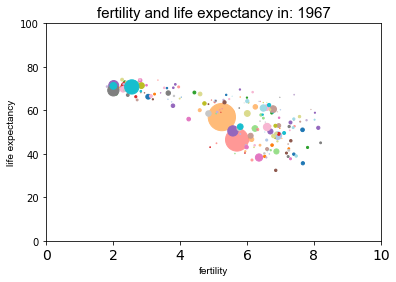

<Figure size 1080x1080 with 0 Axes>

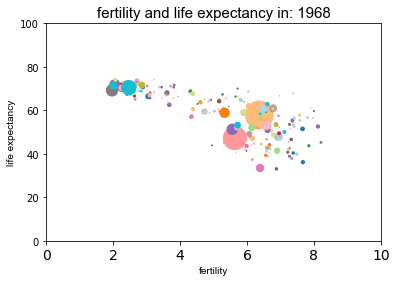

<Figure size 1080x1080 with 0 Axes>

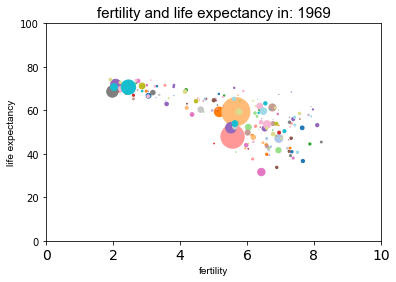

<Figure size 1080x1080 with 0 Axes>

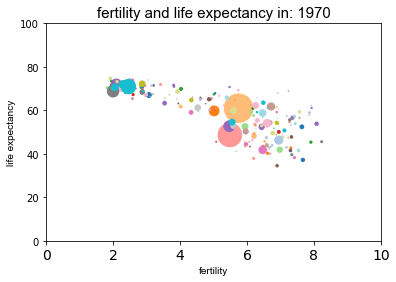

<Figure size 1080x1080 with 0 Axes>

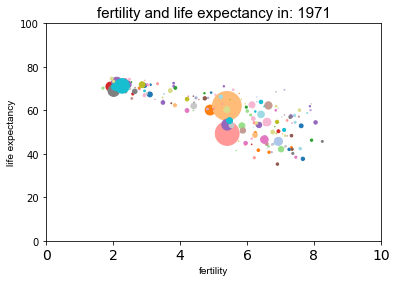

<Figure size 1080x1080 with 0 Axes>

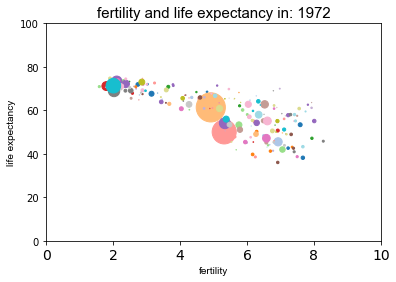

<Figure size 1080x1080 with 0 Axes>

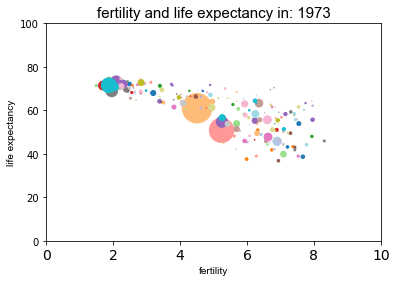

<Figure size 1080x1080 with 0 Axes>

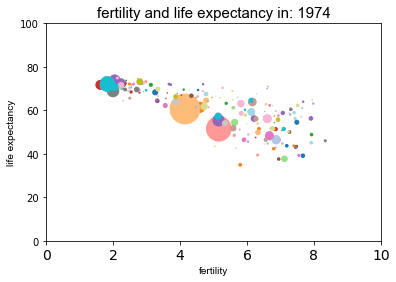

<Figure size 1080x1080 with 0 Axes>

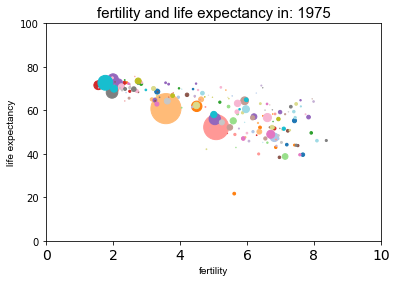

<Figure size 1080x1080 with 0 Axes>

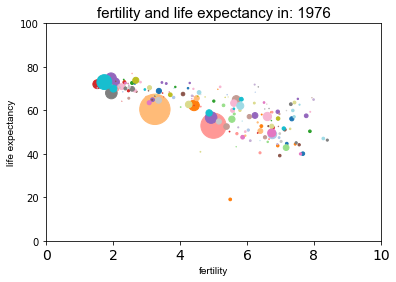

<Figure size 1080x1080 with 0 Axes>

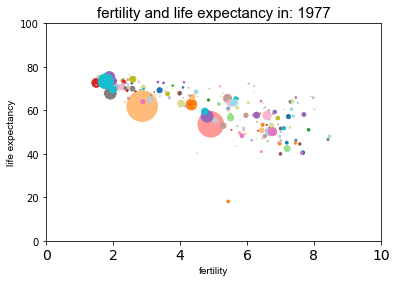

<Figure size 1080x1080 with 0 Axes>

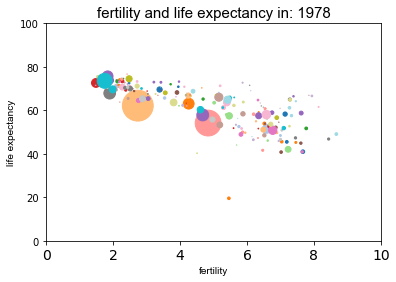

<Figure size 1080x1080 with 0 Axes>

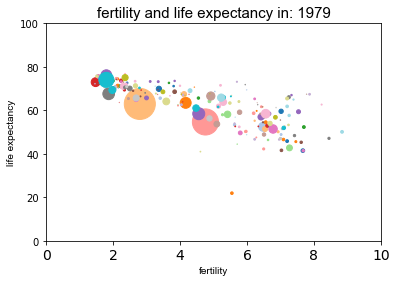

<Figure size 1080x1080 with 0 Axes>

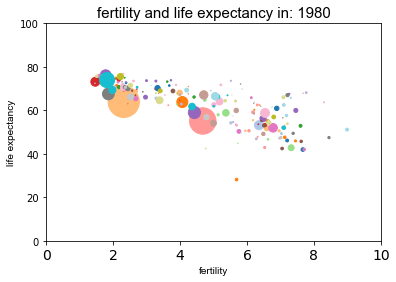

<Figure size 1080x1080 with 0 Axes>

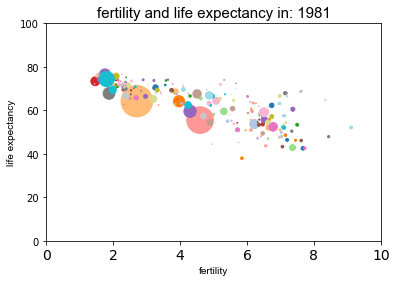

<Figure size 1080x1080 with 0 Axes>

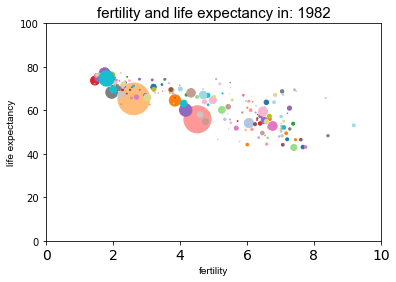

<Figure size 1080x1080 with 0 Axes>

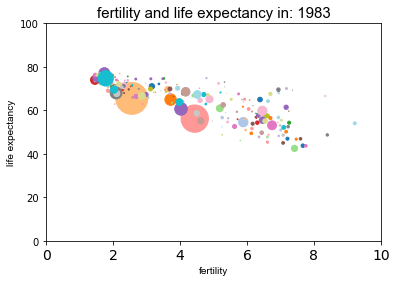

<Figure size 1080x1080 with 0 Axes>

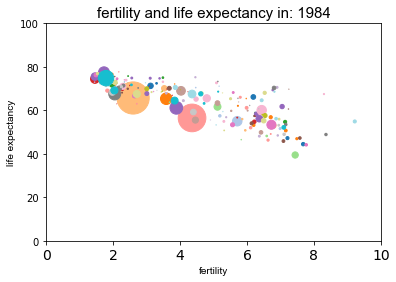

<Figure size 1080x1080 with 0 Axes>

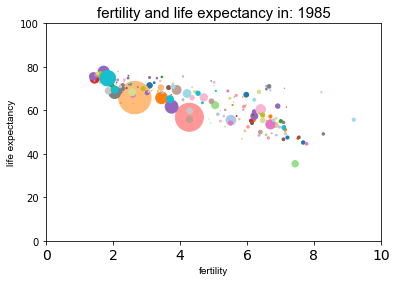

<Figure size 1080x1080 with 0 Axes>

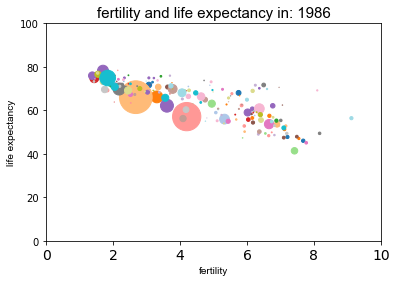

<Figure size 1080x1080 with 0 Axes>

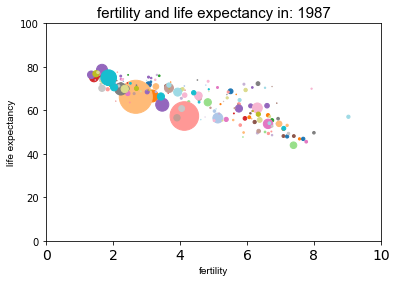

<Figure size 1080x1080 with 0 Axes>

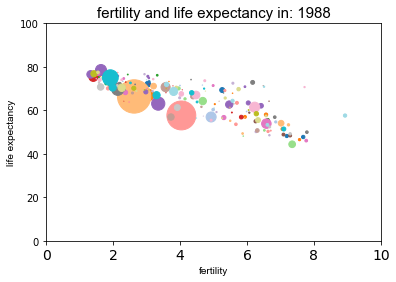

<Figure size 1080x1080 with 0 Axes>

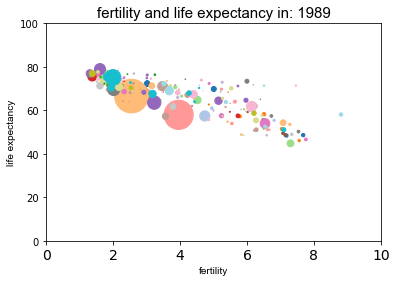

<Figure size 1080x1080 with 0 Axes>

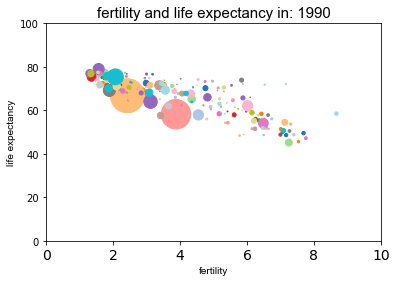

<Figure size 1080x1080 with 0 Axes>

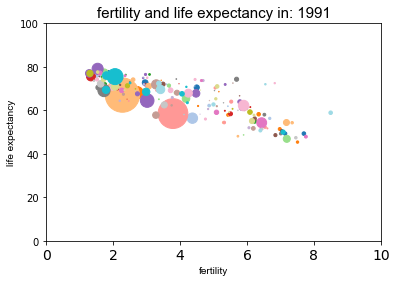

<Figure size 1080x1080 with 0 Axes>

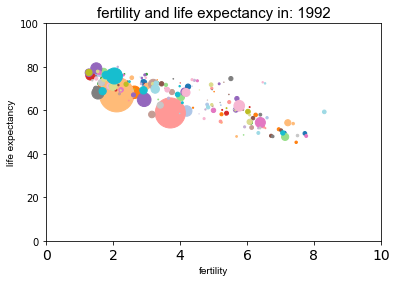

<Figure size 1080x1080 with 0 Axes>

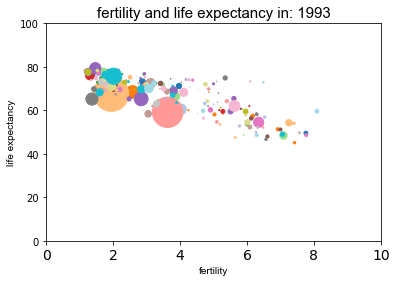

<Figure size 1080x1080 with 0 Axes>

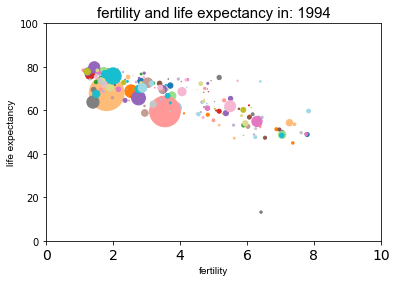

<Figure size 1080x1080 with 0 Axes>

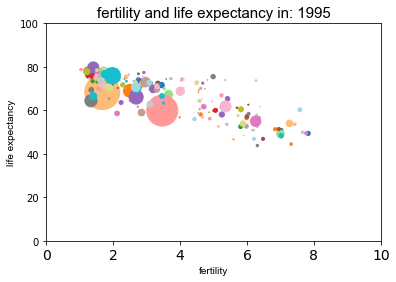

<Figure size 1080x1080 with 0 Axes>

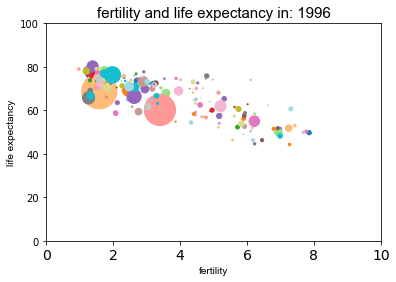

<Figure size 1080x1080 with 0 Axes>

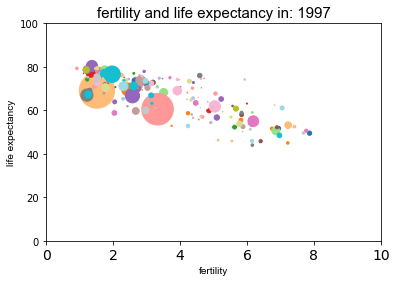

<Figure size 1080x1080 with 0 Axes>

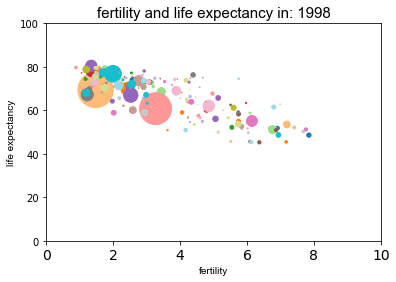

<Figure size 1080x1080 with 0 Axes>

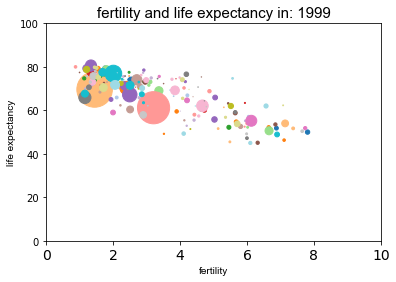

<Figure size 1080x1080 with 0 Axes>

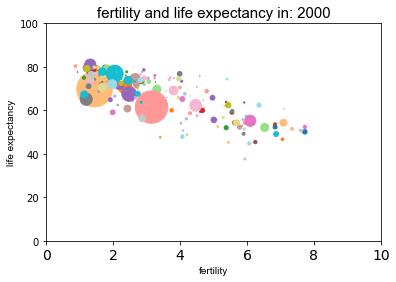

<Figure size 1080x1080 with 0 Axes>

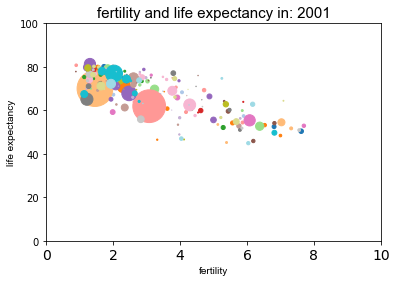

<Figure size 1080x1080 with 0 Axes>

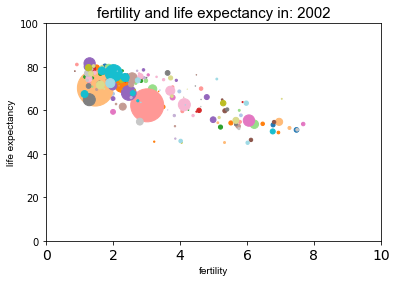

<Figure size 1080x1080 with 0 Axes>

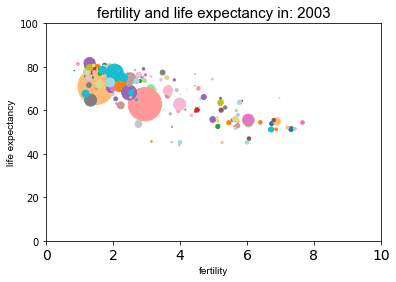

<Figure size 1080x1080 with 0 Axes>

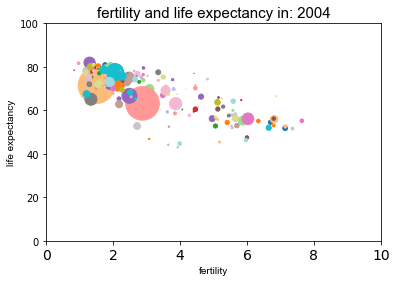

<Figure size 1080x1080 with 0 Axes>

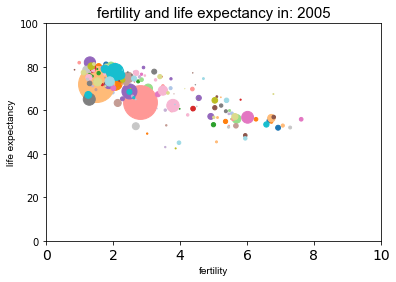

<Figure size 1080x1080 with 0 Axes>

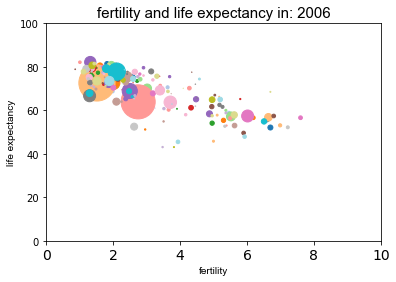

<Figure size 1080x1080 with 0 Axes>

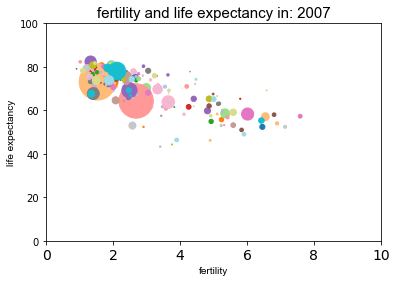

<Figure size 1080x1080 with 0 Axes>

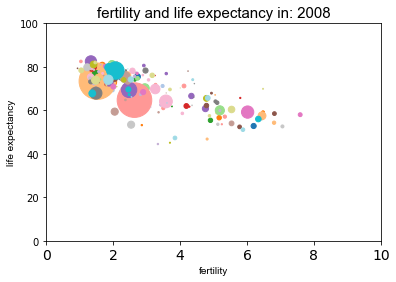

<Figure size 1080x1080 with 0 Axes>

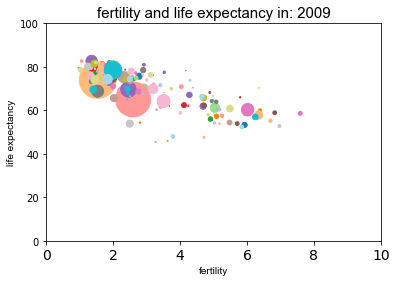

<Figure size 1080x1080 with 0 Axes>

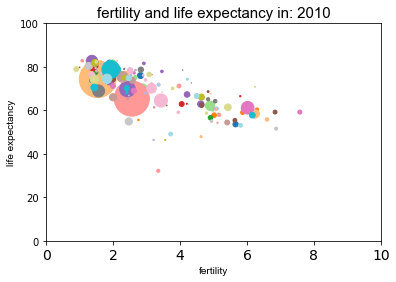

<Figure size 1080x1080 with 0 Axes>

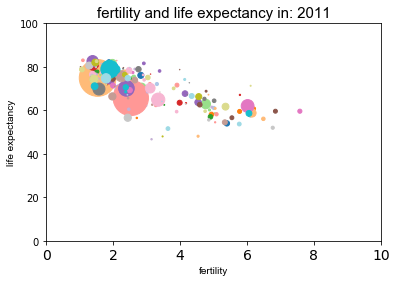

<Figure size 1080x1080 with 0 Axes>

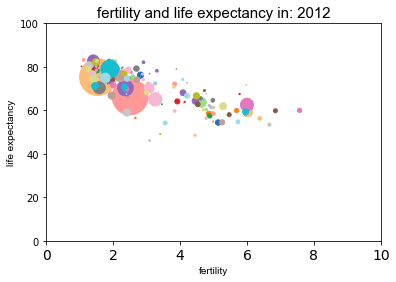

<Figure size 1080x1080 with 0 Axes>

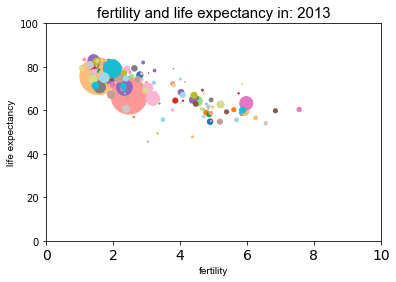

<Figure size 1080x1080 with 0 Axes>

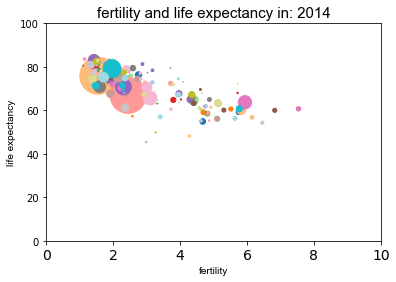

<Figure size 1080x1080 with 0 Axes>

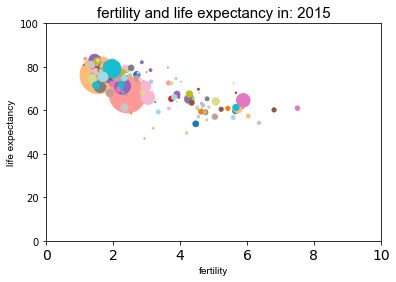

In [35]:
for year in range(1960,2016):
    pyl.figure(figsize=(15, 15))
    df7 = df4.unstack(1)
    df7 = df7[year]
    df7 = df7.unstack(1)
    cmap = plt.get_cmap('tab20', lut = len(df7)).colors
    df7.plot.scatter('fertility', 'lifeexp', s=df7['population'], c=cmap)
    pyl.title(f'fertility and life expectancy in: {year}', fontname='Arial', fontsize=15)
    pyl.xlabel('fertility', fontname='Arial', fontsize=10)
    pyl.ylabel('life expectancy', fontname='Arial', fontsize=10)
    pyl.xticks(fontsize=14)
    pyl.axis(ymin=0, ymax=100, xmin=0, xmax=10)
    pyl.savefig(f'plotsFERT/fertilityvrslifeexp_{year}.png')    
    
   # plt.figure(figsize=(10, 8))
    #df7[year].plot.scatter('fertility', 'lifeexp', s=df7['population'])#(color=['black', 'red', 'green'])
    #plt.title(f'fertility and life expectancy in: {year}', fontname='Arial', fontsize=20)
    #plt.xlabel('fertility', fontname='Arial', fontsize=14)
    #plt.ylabel('life expectancy', fontname='Arial', fontsize=14)
    #plt.xticks(rotation=45, fontsize=14)
    #plt.yticks(fontsize=14)
    #plt.axis(ymin=0, ymax=100)
   # plt.show()


In [36]:
list_of_images = []
for year in range(1960,2016):
    im = imageio.imread(f'plotsFERT/fertilityvrslifeexp_{year}.png')
    list_of_images.append(im)
    
#for time in df.columns:
    #im = imageio.imread(f'plotsPK/Concentration_{time}.png')
    #list_of_images.append(im)

In [37]:
imageio.mimsave('lifeexpectvrsfertilitypop.gif', list_of_images, fps=10)